**Table of Content**

**Introduction:**

The data set consists of 3 classes of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Machine learning model is needed in order to classify the appropriate iris species based on sepal and petal size.

**Objective**

Project Aim:
The aim of this project is to obtain a data-driven machine learning model solution that will allow us develop a model for the classification of flower. Our objective is to classify a new flower as belonging to one of the 3 classes given the 4 features

1. Perform EDA and Explore the features using histograms
2. Encode the target variable ie convert it to numeric type  
3. Experiment using two different ratios of training, validation and test data ie 60-20-20 and 80-10-10.
*   On the two different split ratios do the following
*   Implement KFold Cross Validation
*   Implement Grid Search to find optimal hyperparameters for any 3
    algorithms (out of LR, SVM, MLP, RF, Boosting)
*   Analyze the results on Validation set and test set and mention
    which model performed the best and why?
*   Compare the performance of models(using precision, recall,
    accuracy, latency). What was the best proportion or split ratio of
    data from the set of experiments you conducted?










**Read in Data**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

iris = pd.read_excel('/content/iris .xlsx') #load the dataset`
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris.info()  #checking if there is any inconsistency in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Balanced Dataset**

Here, Iris Dataset is a balanced dataset because the number of data points for every class Setosa, Virginica, and Versicolor is 50. If the classes have different numbers of data points each then it’s an imbalanced dataset

In [ ]:
#count the no of values in each label
iris['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [ ]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data Summary
*   There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
*   There are no null values, so we don't have to worry about that.
*   There are 50 observations of each species (setosa, versicolor, virginica).
*   Variety is the class label which we are predicting













In [ ]:
iris.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


**Checking for Missing Values**

There are no missings values in the dataset

**HANDLING MISSING VALUES & OUTLIERS**
There appears to be no missing values in this dataset. Outliers are detected in some independent
variable. The outliers will be retained as it falls within the possible range value in the prediction.

In [ ]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

#**EDA & Cleaning: Exploring Features**

The dataset contains information of 3 classes of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The columns in this dataset are:


1. sepal.length
2. sepal.width
3. petal.length
4. petal.width
5. Variety

**Plot Continuous Features**


#Univariate Analysis

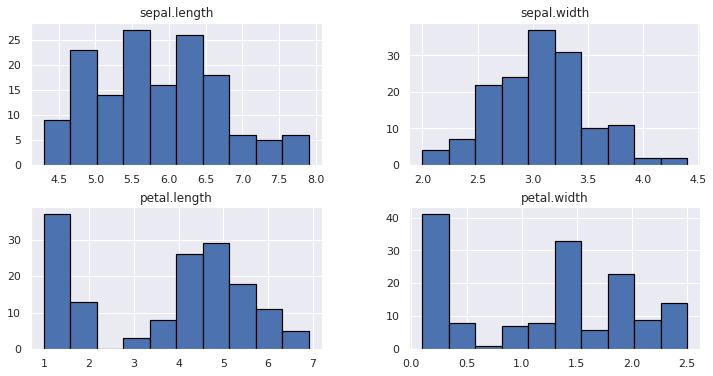

In [ ]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

#Bi-Variate Analysis

Histograms shows that two of the input attribute have Gaussian distribution

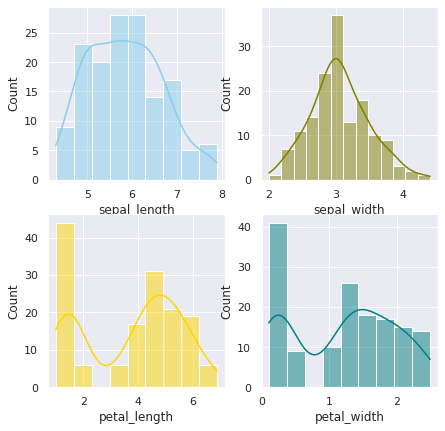

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
df = sns.load_dataset("iris")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x="sepal_length", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="sepal_width", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="petal_length", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="petal_width", kde=True, color="teal", ax=axs[1, 1])

plt.show()


**Analysis of the Visualization**

Relationship between species and sepal length

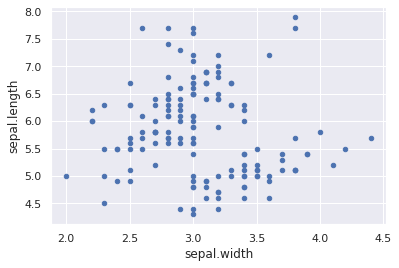

In [ ]:
iris.plot(kind='scatter',x='sepal.width',y='sepal.length')

**Sepal_width distribution**
* From the histogram , it can be observed that  this column is normally distributed which is  proven by the skewness value of (0.33). It indicates that the column is platikurtic.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


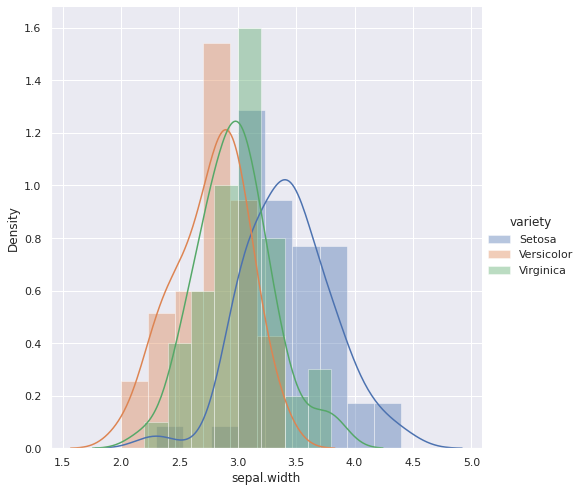

In [ ]:
sns.FacetGrid(iris, hue="variety", size=7) \
.map(sns.distplot,"sepal.width")\
.add_legend();
plt.show();

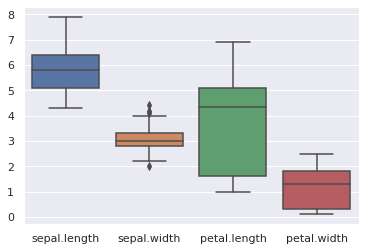

In [ ]:
sns.boxplot(data=iris.iloc[:,0:4])

**Correlation Analysis**



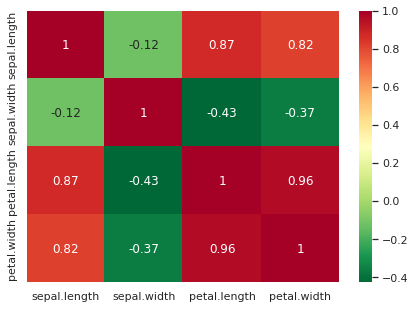

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(iris.corr(),annot=True,cmap='RdYlGn_r')
plt.show()

#**Data Pre-processing**

This stage mainly focusses on preprocessing/clean the data from noise to improve the accuracy of the
results, essentially reducing errors in the data. A Standard scaler normalization of the dataset is done
to ensure that the data has equal weightage when building a classifier.

**SMOTE**

Also, in order to obtain an accurate and
efficient model due to the imbalanced nature of the dataset, the Synthetic Minority Oversampling
Technique (SMOTE) is applied. For this dataset, the aim is to ensure that all the target values
have similar resulting row count.





**Features Separating**

In this section, the 'target' (dependent) column will be seperated from independent columns

*Label Encoding*

**Convert variety to numeric**

This section will perform label encoding for target column "variety" converting it to numeric type

In [ ]:
X = iris.drop(columns = ['variety'])
y = iris['variety'].values

After Encoding  'Iris-setosa' assigned as 0, 'Iris-versicolor' assigned as 1 and Iris=Virginica is assigned as 2.

In [ ]:
vareity_num = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

iris['variety'] = iris['variety'].map(vareity_num)

In [ ]:
# --- Perform Label Encoding ---
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Write out claned data**

In [ ]:
#iris.to_excel('/content/iris_cleaned.xlsx', index=False)

**Scaling**

The parameters used for scaling should ONLY be generated from training dataset and no data from testing should be used for the same, in order to ensure independence between training data and testing data.

#**Modeling**

The given problem is a **multi-class classification problem**, therefore, classification algorithms will be implemented to build the selected models (RF, Boosting and SVM).¶ In the case of this dataset, we are dealing with a multi-class data which is samples belonging to three classes (setosa, versicolor and virginica) and we want to learn from already labeled data how to predict the class of unlabeled data.

**Measuring Success: Splitting up the data for train, validation and test set**.

**First Requirement**

Split the dataset up into the following segments:

1. Training Data: 60%
2. Validation Data: 20%
3. Test Data: 20%



**Split into train, Validation and Test Set**

After pre-processing and balancing the dataset, data splitting was performed on the
oversampled/balanced dataset for cross validation. The dataset is split in 2 ways
1) Into training 80% used to develop the predictive models while the and 10% testing  and 10% validation set used to evaluate the model’s

2)  Into training 60% used to develop the predictive models while the and 20% testing  and 20% validation set used to evaluate the model’s
performance to measure how well the selected model generalizes to new unseen dataset to make accurate features importance prediction on the dataset.

In [ ]:
import pandas as  pd
from sklearn.model_selection import train_test_split

In [ ]:
  features = iris.drop('variety', axis=1)
  labels = iris['variety']


  X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
  X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


The code below verifys that:
the total length of labels which represents our full dataset is= 150


*   Length of y_train= 60% of the iris dataset = 90
*   Length of y_val =  20% of the iris dataset = 30
*   Length of y_test = 20% of the iris dataset = 30






In [ ]:
print(len(X),len(y_train),len(y_val),len(y_test))

150 90 30 30


**Write out Data**

In [ ]:
# Read in all features

iris_train = X_train
iris_val = X_val
iris_test = X_test


iris_train.head()



,sepal.length,sepal.width,petal.length,petal.width
123,6.3,2.7,4.9,1.8
24,4.8,3.4,1.9,0.2
25,5.0,3.0,1.6,0.2
23,5.1,3.3,1.7,0.5
94,5.6,2.7,4.2,1.3


In [ ]:


iris_train_labels = y_train
iris_val_labels = y_val
iris_test_labels = y_test


In [ ]:
from sklearn.preprocessing import StandardScaler #for standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(iris_train)
X_test = scaler.transform(iris_test)

#**MODEL SELECTION**
This stage of the report will show how machine learning algorithms were applied to both the training
set (to develop the various classification models) and validation and test set (to evaluate the generated model’s
performance). As seen below, an enhanced proposed model is built with hyperparameter tuning using cross
validation methods to enhance the models.

#**Random Forest Classifier**

Random is a supervised machine learning algorithm based on ensemble learning used widely for regression and classification problems .  Based its random nature, it is able to create decision trees on randomly selected training datasets and obtain predictions from these trees for modelling outcome.

In [ ]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = iris_train
tr_labels = iris_train_labels

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

**Hyper parameter Tuning**

In [ ]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 50}

0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 250}
0.878 (+/-0.215) for {'max_depth': 4, 'n_estimators': 5}
0.933 (+/-0.215) for {'max_depth': 4, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': 4, 'n_estimators': 250}
0.889 (+/-0.199) for {'max_depth': 8, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 8, 'n_estimators': 50}
0.933 (+/-0.215) for {'max_depth': 8, 'n_estimators': 250}
0.889 (+/-0.172) for {'max_depth': 16, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 16, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 16, 'n_estimators': 250}
0.911 (+/-0.206) for {'max_depth': 32, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 32, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': 32, 'n_estimators': 250}
0.911 (+/-0.194) for {'max_depth': None, 'n_estimators': 5}
0.922 (+/-0.2

In [ ]:
joblib.dump(cv.best_estimator_, '../../../RF_model.pkl')

['../../../RF_model.pkl']

In [ ]:
models = {}

for md in ['cv']:
  models[md] = joblib.load('../../../RF_model.pkl'.format(md))

In [ ]:
from time import time
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='weighted'), 3)
    recall = round(recall_score(labels, pred, average='weighted'), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))


In [ ]:
evaluate_model('Random Forest Model test', models['cv'], iris_test, iris_test_labels)

Random Forest Model test -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 13.2ms


In [ ]:
evaluate_model('Random Forest Model Val', models['cv'], iris_val, iris_val_labels)

Random Forest Model Val -- 	Accuracy: 0.967 / Precision: 0.969 / Recall: 0.967 / Latency: 18.1ms


#Support Vector Machine (SVM)

SVM is a supervised machine learning algorithm that can be applied for both regression and classification problems. SVM classify data into two or more classes as it is designed for binary classification. In applying SVM, it is known to achieve better results when compared to other classifiers (Abedi et al., 2012).  It is used to obtain the most appropriate hyperplane which can split the dataset into two classes of 0 and 1.   When the input feature vectors are non - linearly separable, SVM first uses the kernel trick to map the data into a high dimensional feature space (Boateng et al., 2020) and then classifies the data using the maximal margin hyper-plane as follows:



In [ ]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = iris_train
tr_labels = iris_train_labels

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.922 (+/-0.113) for {'C': 0.1, 'kernel': 'linear'}
0.8 (+/-0.218) for {'C': 0.1, 'kernel': 'rbf'}
0.956 (+/-0.083) for {'C': 1, 'kernel': 'linear'}
0.922 (+/-0.113) for {'C': 1, 'kernel': 'rbf'}
0.933 (+/-0.109) for {'C': 10, 'kernel': 'linear'}
0.944 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [ ]:
cv.best_estimator_

SVC(C=1, kernel='linear')

In [ ]:
joblib.dump(cv.best_estimator_, '../../../SVM_model.pkl')

['../../../SVM_model.pkl']

In [ ]:
models = {}

for md in ['cv']:
  models[md] = joblib.load('../../../SVM_model.pkl'.format(md))

In [ ]:
from time import time
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='weighted'), 3)
    recall = round(recall_score(labels, pred, average='weighted'), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

**Evaluate Models on Test and Validation Set**

In [ ]:
evaluate_model('SVM Model test', models['cv'], iris_test, iris_test_labels)

SVM Model test -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.1ms


In [ ]:
evaluate_model('SVM Val', models['cv'], iris_val, iris_val_labels)

SVM Val -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.1ms


##XGBoost

**Fit and evaluate a basic model using 5-fold Cross-Validation**

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import warnings

tr_features = iris_train
tr_labels = iris_train_labels

In [ ]:
XGBoost = XGBClassifier()

scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=5)

In [ ]:
scores

array([1.        , 0.72222222, 1.        , 0.94444444, 0.94444444])

**Grid Search to find optimal hyperparameters**

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

tr_features = iris_train
tr_labels = iris_train_labels

**Hyperparameter Tuning of XGBoost**

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

###Evaluate Result on Validation set

Here, we would fit the best few models on the full training set and then evaluate the model on the validation set

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

tr_features = iris_train
tr_labels = iris_train_labels

val_features = iris_val
val_labels = iris_val_labels

te_features = iris_test
te_labels = iris_test_labels

**Fit best models on full training set**

In [ ]:
XGBoost1 = XGBClassifier(n_estimators=5, max_depth=2)
XGBoost1.fit(tr_features, tr_labels.values.ravel())

XGBoost2 = XGBClassifier(n_estimators=100, max_depth=10)
XGBoost2.fit(tr_features, tr_labels.values.ravel())

XGBoost3 = XGBClassifier(n_estimators=50, max_depth=20)
XGBoost3.fit(tr_features, tr_labels.values.ravel())

XGBClassifier(max_depth=20, n_estimators=50, objective='multi:softprob')

In [ ]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}

0.6 (+/-0.452) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.9 (+/-0.191) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.933 (+/-0.215) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.922 (+/-0.206) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.711 (+/-0.247) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.889 (+/-0.172) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.889 (+/-0.172) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.9 (+/-0.191) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.722 (+/-0.233) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.911 (+/-0.194) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.911 (+/-0.194) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.911 (+/-0.194) for {'learning_rate':

In [ ]:
joblib.dump(cv.best_estimator_, '../../../GB_model.pkl')

['../../../GB_model.pkl']

In [ ]:
models = {}

for md in ['cv']:
  models[md] = joblib.load('../../../SVM_model.pkl'.format(md))

In [ ]:
from time import time
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='weighted'), 3)
    recall = round(recall_score(labels, pred, average='weighted'), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [ ]:
evaluate_model('gb Model test', models['cv'], iris_test, iris_test_labels)
evaluate_model('gb Model test', models['cv'], iris_test, iris_test_labels)

gb Model test -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.1ms
gb Model test -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.3ms


#Comparing the Models for the (60:20:20) split
* Random Forest
* SVM
* Gradient Boosting

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = iris_val
val_labels = iris_val_labels

tr_features = iris_train
tr_labels = iris_train_labels

models = {}

for mdl in ['SVM', 'RF', 'GB']:
    models[mdl] = joblib.load('../../../{}_model.pkl'.format(mdl))

In [ ]:
models

{'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier(max_depth=4, n_estimators=50),
 'GB': GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)}

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

models = []
models.append(['SVM', SVC(random_state=0)])
models.append(['XG Boost', GradientBoostingClassifier()])
models.append(['Random Forest', RandomForestClassifier()])



lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =5)   #K-Fold Validation
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))

[[12  0  0]
 [ 0  6  0]
 [ 0  0 12]]
Accuracy Score:  1.0
[[12  0  0]
 [ 0  6  0]
 [ 0  0 12]]
Accuracy Score:  1.0
[[12  0  0]
 [ 0  6  0]
 [ 0  0 12]]
Accuracy Score:  1.0


**EXPERIMENTAL RESULTS**

From the Table above, it appears that all the accuracy for the prediction are overfitted despited applying scaling the dataset and applying hyper parameterr tuning.  The predicted accuracy for logistic regression and XGBoost gives the highest result with accuracy after applying validation test of 90.15% higher than RF and Gradient Boosting both with tuning the parameters thereby being the
best model. Cross Validation used to evaluate generalization performance of algorithms on this dataset
was a 5-fold cross validation (cv=5). 95% of the data (nine-fifth) was used to fit the model in each
iteration which summarized and generated an average/mean cross validation score resulting in a more
accurate model.

**Confusion Matrix**

The confusion matrix indicates that the model was able to predict a higher true positive value and no true negative value.


#Data Spliting 80:10:10

In [ ]:
features = iris.drop('variety', axis=1)
labels = iris['variety']


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


The code below verifys that:
the total length of labels which represents our full dataset is= 150


*   Length of y_train= 80% of the iris dataset = 120
*   Length of y_val =  10% of the iris dataset = 15
*   Length of y_test = 10% of the iris dataset = 15

In [ ]:
print(len(X),len(y_train),len(y_val),len(y_test))

150 120 15 15


#**Model Creation**

#Random Forest Classsifier

**Fit and evaluate a basic model using 5-fold Cross-Validation**

In [ ]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = iris_train
tr_labels = iris_train_labels

#Hyperparameter Tuning

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
rf1 = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 5}

0.944 (+/-0.172) for {'max_depth': 2, 'n_estimators': 5}
0.933 (+/-0.215) for {'max_depth': 2, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 250}
0.933 (+/-0.163) for {'max_depth': 4, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 4, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 4, 'n_estimators': 250}
0.911 (+/-0.151) for {'max_depth': 8, 'n_estimators': 5}
0.933 (+/-0.215) for {'max_depth': 8, 'n_estimators': 50}
0.933 (+/-0.215) for {'max_depth': 8, 'n_estimators': 250}
0.933 (+/-0.163) for {'max_depth': 16, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 16, 'n_estimators': 50}
0.933 (+/-0.215) for {'max_depth': 16, 'n_estimators': 250}
0.922 (+/-0.206) for {'max_depth': 32, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 32, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 32, 'n_estimators': 250}
0.933 (+/-0.13) for {'max_depth': None, 'n_estimators': 5}
0.922 (+/-0.206

*Writing out pickled model*

In [ ]:
joblib.dump(cv.best_estimator_, '../../../RF_model.pkl')

['../../../RF_model.pkl']

In [ ]:
models = {}

for md in ['cv']:
  models[md] = joblib.load('../../../RF_model.pkl'.format(md))


from time import time
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='weighted'), 3)
    recall = round(recall_score(labels, pred, average='weighted'), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

evaluate_model('Random Forest Model test', models['cv'], iris_test, iris_test_labels)

Random Forest Model test -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.9ms


In [ ]:
scores

array([1.        , 0.72222222, 1.        , 0.94444444, 0.94444444])

**Gridsearch to find optimal hyperparameter**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

tr_features = iris_train
tr_labels = iris_train_labels

**Hyperparameter tuning for Random Forest**

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
rf1 = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 20, 'n_estimators': 50}

0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 100}
0.922 (+/-0.206) for {'max_depth': 10, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 10, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': 10, 'n_estimators': 100}
0.922 (+/-0.218) for {'max_depth': 20, 'n_estimators': 5}
0.933 (+/-0.215) for {'max_depth': 20, 'n_estimators': 50}
0.933 (+/-0.215) for {'max_depth': 20, 'n_estimators': 100}
0.911 (+/-0.194) for {'max_depth': None, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 100}


In [ ]:
models = {}

for md in ['cv']:
  models[md] = joblib.load('../../../RF_model.pkl'.format(md))


from time import time
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='weighted'), 3)
    recall = round(recall_score(labels, pred, average='weighted'), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

evaluate_model('Random Forest Model test', models['cv'], iris_test, iris_test_labels)

Random Forest Model test -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.8ms


#XGBoost

**Fit and evaluate a basic model using 5-fold Cross-Validation**

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import warnings

tr_features = iris_train
tr_labels = iris_train_labels

In [ ]:
XGBoost = XGBClassifier()

scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=5)

In [ ]:
scores

array([1.        , 0.72222222, 1.        , 0.94444444, 0.94444444])

**Grid search to find optimal hyperparameters**

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

tr_features = iris_train
tr_labels = iris_train_labels

**Hyperparameter Tunning**

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
XGBoost = XGBClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 5}

0.856 (+/-0.269) for {'max_depth': 2, 'n_estimators': 5}
0.9 (+/-0.191) for {'max_depth': 2, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': 2, 'n_estimators': 100}
0.933 (+/-0.215) for {'max_depth': 10, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 10, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 10, 'n_estimators': 100}
0.9 (+/-0.215) for {'max_depth': 20, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 20, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 20, 'n_estimators': 100}
0.9 (+/-0.178) for {'max_depth': None, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': None, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 100}


#Evaluate Result on Validation set

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

tr_features = iris_train
tr_labels = iris_train_labels

val_features = iris_val
val_labels = iris_val_labels

te_features = iris_test
te_labels = iris_test_labels

**Fit Best Model on full training set**

In [ ]:
XGBoost1 = XGBClassifier(n_estimators=100, max_depth=10)
XGBoost1.fit(tr_features, tr_labels.values.ravel())

XGBoost2 = XGBClassifier(n_estimators=100, max_depth=2)
XGBoost2.fit(tr_features, tr_labels.values.ravel())

XGBoost3 = XGBClassifier(n_estimators=50, max_depth=2)
XGBoost3.fit(tr_features, tr_labels.values.ravel())

XGBClassifier(max_depth=2, n_estimators=50, objective='multi:softprob')

**Evaluate Models on Validation set**

In [ ]:
models = {}

for md in ['cv']:
  models[md] = joblib.load('../../../GB_model.pkl'.format(md))


from time import time
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='weighted'), 3)
    recall = round(recall_score(labels, pred, average='weighted'), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

evaluate_model('XGBoost Model test', models['cv'], iris_test, iris_test_labels)

XGBoost Model test -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.4ms


#**SVM**

In [ ]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = iris_train
tr_labels = iris_train_labels

#Hyperparaameter Tuning

In [ ]:
  def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.922 (+/-0.113) for {'C': 0.1, 'kernel': 'linear'}
0.8 (+/-0.218) for {'C': 0.1, 'kernel': 'rbf'}
0.956 (+/-0.083) for {'C': 1, 'kernel': 'linear'}
0.922 (+/-0.113) for {'C': 1, 'kernel': 'rbf'}
0.933 (+/-0.109) for {'C': 10, 'kernel': 'linear'}
0.944 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [ ]:
cv.best_estimator_

SVC(C=1, kernel='linear')

#Writing out pickled models

In [ ]:
joblib.dump(cv.best_estimator_, '../../../SVM_model.pkl')

In [ ]:
models = {}

for md in ['cv']:
  models[md] = joblib.load('../../../SVM_model.pkl'.format(md))


from time import time
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='weighted'), 3)
    recall = round(recall_score(labels, pred, average='weighted'), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

evaluate_model('SVM Model test', models['cv'], iris_test, iris_test_labels)

SVM Model test -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 5.5ms


#Comparing our model 80:10:10 split

In this section, we will do the following:
1. Evaluate all of our saved models on the validation set
2. Select the best model based on performance on the validation set
3. Evaluate that model on the holdout test set

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = iris_val
val_labels = iris_val_labels

tr_features = iris_train
tr_labels = iris_train_labels

In [ ]:
models = {}

for mdl in ['SVM', 'RF', 'GB']:
    models[mdl] = joblib.load('../../../{}_model.pkl'.format(mdl))

In [ ]:
models

{'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier(max_depth=2, n_estimators=5),
 'GB': GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=250)}

In [ ]:
models = []
models.append(['SVM', SVC(random_state=0)])
models.append(['XG Boost', GradientBoostingClassifier()])
models.append(['Random Forest', RandomForestClassifier()])



lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =5)   #K-Fold Validation
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))


[[5 0 0]
 [0 3 0]
 [0 0 7]]
Accuracy Score:  1.0
[[5 0 0]
 [0 3 0]
 [0 0 7]]
Accuracy Score:  1.0
[[5 0 0]
 [0 3 0]
 [0 0 7]]
Accuracy Score:  1.0


#Model Analysis

The models appear to be overfitted despite applying hyperparameter tuning for both splits.

**EXPERIMENTAL RESULTS**

From the Table above, it appears that all the accuracy for the prediction are overfitted despited applying scaling the dataset and applying hyper parameterr tuning.  The predicted accuracy for logistic regression and XGBoost gives the highest result with accuracy after applying validation test of 90.15% higher than RF and Gradient Boosting both with tuning the parameters thereby being the
best model. Cross Validation used to evaluate generalization performance of algorithms on this dataset
was a 5-fold cross validation (cv=5). 95% of the data (nine-fifth) was used to fit the model in each
iteration which summarized and generated an average/mean cross validation score resulting in a more
accurate model.

#**Conclusion**

This approach shows machine learning is effective for multi-class classification problems. The final results
indicates that all models achieved very good accuracys.

The split of data 60:20:20 has a better classification performane as it correctly classified 12 as belonging to the True Positive (TP).

A limitation is the
dataset used is small and a larger dataset would have generated better insights to avoid overfitting.
